In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import AveragePooling1D, Activation, Flatten, Dense
from keras.layers import GlobalMaxPooling1D, Dropout
from keras.layers import GlobalAveragePooling1D, UpSampling1D
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import SGD, Adam, Nadam, Adamax
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from data_in_2s import data_in, normali
from modify_new import modify_model
from orignal_model import ori_model
#from tqdm import tqdm
#from sklearn.model_selection import train_test_split

/Users/xufanxiong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_test = 6
X_train, y_train = data_in(num_test)

In [3]:
#Nomalization
y_train = (y_train-50)/150
#X_train = normali(X_train)
print('Shape of X_train is: ' + str(X_train.shape))
print('Shape of y_train is: ' + str(y_train.shape))

Shape of X_train is: (3225, 1000, 5)
Shape of y_train is: (3225, 1)


In [4]:
#Import and Split test data

name_x = 'Training_data/DATA_%.2d_TYPE02.mat'%num_test
in_tem_x = sio.loadmat(name_x)['sig']
in_tem_x = in_tem_x.T

name_y = 'Training_data/DATA_%.2d_TYPE02_BPMtrace.mat'%num_test
in_tem_y = sio.loadmat(name_y)['BPM0']

X_test_tem = np.zeros((in_tem_y.shape[0]*2, 125*8, 5))

k = 0

for j in range(in_tem_y.shape[0]*2-1):
	X_test_tem[j, :, :] =  in_tem_x[k:(k+125*8), 1:]
	k += 125

tem_y = np.zeros((in_tem_y.shape[0]*2, 1))
index = [a*2 for a in range(in_tem_y.shape[0])]
tem_y[index] = in_tem_y

for b in range(tem_y.shape[0]-1):
	if tem_y[b] == 0:
		tem_y[b] = (tem_y[b-1] + tem_y[b+1])/2.

y_test = tem_y[:-1, :]
X_test = X_test_tem[:-1, :, :]

y_test = (y_test-50)/150
#X_test = normali(X_test)

print('The shape of X_test is: ' + str(X_test.shape))
print('The shape of y_test is: ' + str(y_test.shape))

The shape of X_test is: (299, 1000, 5)
The shape of y_test is: (299, 1)


In [5]:
X_train_PPG = X_train[:, :, :2]
X_train_acc = X_train[:, :, 2:]

Heart rate is: [156.9130555]


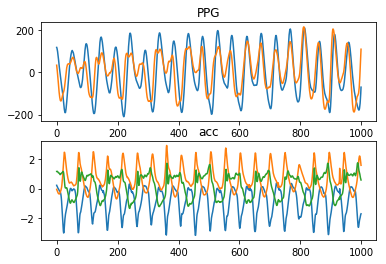

In [6]:
num_in = 1700
print('Heart rate is: ' + str(y_train[num_in]*150+50))
plt.subplot(211)
plt.plot(X_train_PPG[num_in, :, :])
plt.title('PPG')
plt.subplot(212)
plt.plot(X_train_acc[num_in, :, :])
plt.title('acc')
plt.show()

In [7]:
fir_model = ori_model((1000, 1), 16)

/Users/xufanxiong/Desktop/Troika_1/orignal_model.py:199: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model = Model(input=inputs, output=output)


In [8]:
optm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
fir_model.compile(loss= "mse", 
              optimizer=optm, 
              metrics=["mse"])

In [10]:
filepath="weight_troika_ori_2s.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_mean_squared_error', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = fir_model.fit(X_train[:, :, :1], y_train, 
                    epochs=100, 
                    batch_size=128, 
                    validation_split=0.2, 
                    callbacks=callbacks_list,
                    shuffle=True,
                    verbose=1)

Train on 2580 samples, validate on 645 samples
Epoch 1/100
2580/2580 [==============================] - 157s 61ms/step - loss: 0.3864 - mean_squared_error: 0.0023 - val_loss: 0.5405 - val_mean_squared_error: 0.1593

Epoch 00001: val_mean_squared_error improved from inf to 0.15933, saving model to weight_troika_ori_2s.hdf5
Epoch 2/100
2580/2580 [==============================] - 161s 62ms/step - loss: 0.3807 - mean_squared_error: 0.0019 - val_loss: 0.6070 - val_mean_squared_error: 0.2311

Epoch 00002: val_mean_squared_error did not improve from 0.15933
Epoch 3/100
2580/2580 [==============================] - 159s 62ms/step - loss: 0.3748 - mean_squared_error: 0.0013 - val_loss: 0.5998 - val_mean_squared_error: 0.2292

Epoch 00003: val_mean_squared_error did not improve from 0.15933
Epoch 4/100
2580/2580 [==============================] - 162s 63ms/step - loss: 0.3693 - mean_squared_error: 0.0011 - val_loss: 0.5764 - val_mean_squared_error: 0.2111

Epoch 00004: val_mean_squared_error did

2580/2580 [==============================] - 161s 63ms/step - loss: 0.2256 - mean_squared_error: 4.2285e-04 - val_loss: 0.3211 - val_mean_squared_error: 0.0981

Epoch 00034: val_mean_squared_error did not improve from 0.00937
Epoch 35/100
2580/2580 [==============================] - 156s 61ms/step - loss: 0.2216 - mean_squared_error: 4.4363e-04 - val_loss: 0.3155 - val_mean_squared_error: 0.0965

Epoch 00035: val_mean_squared_error did not improve from 0.00937
Epoch 36/100
2580/2580 [==============================] - 163s 63ms/step - loss: 0.2176 - mean_squared_error: 4.0262e-04 - val_loss: 0.3184 - val_mean_squared_error: 0.1034

Epoch 00036: val_mean_squared_error did not improve from 0.00937
Epoch 37/100
2580/2580 [==============================] - 171s 66ms/step - loss: 0.2138 - mean_squared_error: 5.7076e-04 - val_loss: 0.2969 - val_mean_squared_error: 0.0858

Epoch 00037: val_mean_squared_error did not improve from 0.00937
Epoch 38/100
1792/2580 [===================>..........] -

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
filepath="weight_troika_ori_2s.hdf5"
fir_model.load_weights(filepath)

In [ ]:
#fir_model.summary()

In [ ]:
#Evaluate
#eva = finalmodel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
#print('loss = ' + str(eva[0]))
#print('Test MSE = ' + str(eva[1]))

In [ ]:
pred_label = fir_model.predict(X_train[:, :, 0])

In [ ]:
mod_model, y_mod_label = modify_model((1000, 1), y_train, pred_label, 16)

In [ ]:
optm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
mod_model.compile(loss= "mse", 
              optimizer=optm, 
              metrics=["mse"])

In [ ]:
filepath="weight_troika_ori_modify_2s.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_mean_squared_error', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = mod_model.fit(X_train, y_mod_label, 
                    epochs=100, 
                    batch_size=128, 
                    validation_split=0.2, 
                    callbacks=callbacks_list,
                    shuffle=True,
                    verbose=1)

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
mod_model.load_weights('weight_troika_ori_modify_2s.hdf5')

In [ ]:
predict = fir_model.predict(X_test)
predict_mod = mod_model.predict(X_test)

In [ ]:
plt.subplot(211)
plt.plot(y_test)
plt.plot(predict)
plt.title('Before modify')
plt.subplot(212)
plt.plot(y_test)
plt.plot(predict+predict_mod)
plt.title('After modify')
plt.show()